# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


#### 2가지의 모델 설정

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000, ), name='input'), 
                      Dense(16, activation='relu', name='hidden1'), 
                      Dense(1, activation='sigmoid', name='output')])

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden1 (Dense)              (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000, ), name='input2'), 
                      Dense(7, activation='relu', name='hidden2'), 
                      Dense(1, activation='sigmoid', name='output2')])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])
model_2.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

#### 2개의 모델 학습

In [8]:
model_1_hist = model_1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.4530 - acc: 0.8221 - val_loss: 0.3367 - val_acc: 0.8827
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2608 - acc: 0.9092 - val_loss: 0.2853 - val_acc: 0.8896
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2003 - acc: 0.9296 - val_loss: 0.2929 - val_acc: 0.8834
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1693 - acc: 0.9398 - val_loss: 0.2929 - val_acc: 0.8842
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1449 - acc: 0.9493 - val_loss: 0.3095 - val_acc: 0.8812
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1285 - acc: 0.9554 - val_loss: 0.3856 - val_acc: 0.8616
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1128 - acc: 0.9618 - val_loss: 0.3578 - val_acc: 0.8719
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1026 - a

In [9]:
model_2_hist = model_2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.5072 - acc: 0.7968 - val_loss: 0.3933 - val_acc: 0.8708
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3061 - acc: 0.9032 - val_loss: 0.3176 - val_acc: 0.8789
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2331 - acc: 0.9216 - val_loss: 0.2833 - val_acc: 0.8896
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1954 - acc: 0.9334 - val_loss: 0.2812 - val_acc: 0.8879
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1695 - acc: 0.9427 - val_loss: 0.2848 - val_acc: 0.8862
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1499 - acc: 0.9494 - val_loss: 0.3000 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1360 - acc: 0.9537 - val_loss: 0.3217 - val_acc: 0.8758
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1225 - a

#### 비교

In [10]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

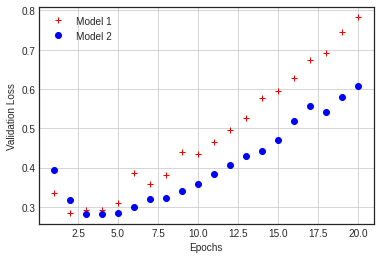

In [12]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [13]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'), 
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [14]:
model_3_hist = model_3.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 34s 701ms/step - loss: 0.5110 - acc: 0.7867 - val_loss: 0.3144 - val_acc: 0.8735
Epoch 2/20
49/49 [==============================] - 32s 653ms/step - loss: 0.2246 - acc: 0.9124 - val_loss: 0.3560 - val_acc: 0.8640
Epoch 3/20
49/49 [==============================] - 32s 651ms/step - loss: 0.1065 - acc: 0.9609 - val_loss: 0.3978 - val_acc: 0.8768
Epoch 4/20
49/49 [==============================] - 32s 652ms/step - loss: 0.0561 - acc: 0.9842 - val_loss: 0.4815 - val_acc: 0.8800
Epoch 5/20
49/49 [==============================] - 32s 661ms/step - loss: 0.1121 - acc: 0.9856 - val_loss: 0.4908 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 32s 649ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.6632 - val_acc: 0.8826
Epoch 7/20
49/49 [==============================] - 32s 649ms/step - loss: 0.1842 - acc: 0.9853 - val_loss: 0.5541 - val_acc: 0.8811
Epoch 8/20
49/49 [==============================] - 32s 649ms/step - 

#### 시각화

In [15]:
model_3_val_loss = model_3_hist.history['val_loss']

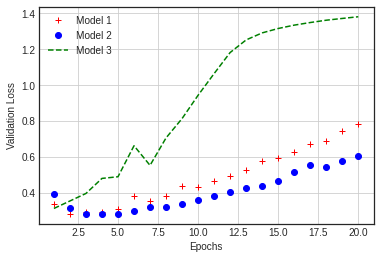

In [16]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

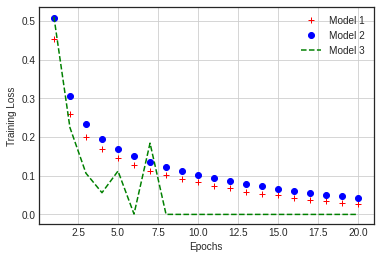

In [18]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [17]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10, 10]), 
                    LeakyReLU(alpha=0.2), 
                    Dense(1, kernel_initializer='he_normal'), 
                    Activation('softmax')])

### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [21]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [22]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [25]:
from tensorflow.keras.optimizers import Adagrad

In [26]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [27]:
from tensorflow.keras.optimizers import RMSprop

In [28]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [34]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


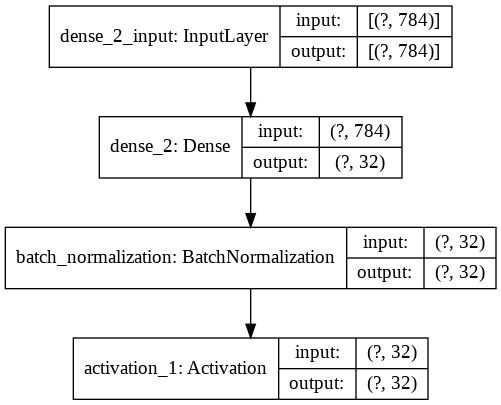

In [37]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [38]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


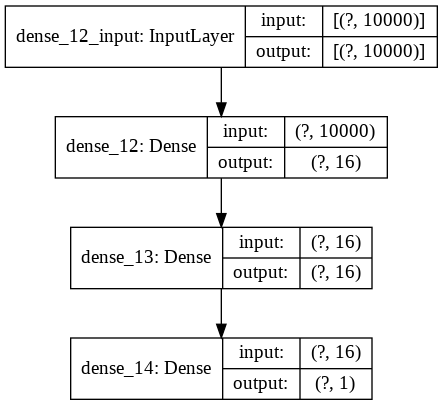

In [42]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [44]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, 
                             batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 47ms/step - loss: 0.5008 - acc: 0.8190 - val_loss: 0.3815 - val_acc: 0.8828
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3181 - acc: 0.9056 - val_loss: 0.3523 - val_acc: 0.8779
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2721 - acc: 0.9195 - val_loss: 0.3280 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2489 - acc: 0.9298 - val_loss: 0.3681 - val_acc: 0.8722
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2377 - acc: 0.9337 - val_loss: 0.3753 - val_acc: 0.8699
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2291 - acc: 0.9384 - val_loss: 0.3629 - val_acc: 0.8776
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2223 - acc: 0.9401 - val_loss: 0.3831 - val_acc: 0.8712
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2168 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

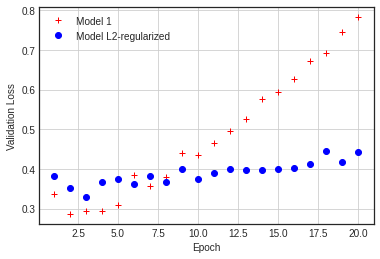

In [45]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()

#### L1과 비교

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


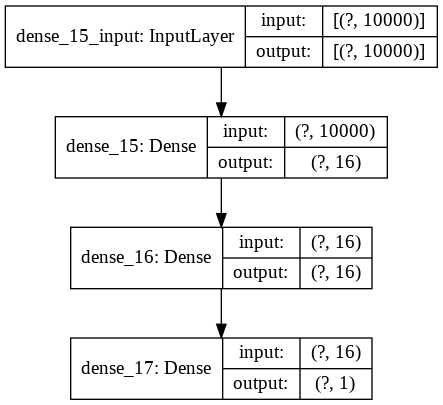

In [46]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [47]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, 
                             batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 47ms/step - loss: 0.5667 - acc: 0.8202 - val_loss: 0.4422 - val_acc: 0.8674
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3818 - acc: 0.8912 - val_loss: 0.3778 - val_acc: 0.8844
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3359 - acc: 0.9046 - val_loss: 0.3684 - val_acc: 0.8818
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3179 - acc: 0.9093 - val_loss: 0.3551 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3078 - acc: 0.9132 - val_loss: 0.3713 - val_acc: 0.8794
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2994 - acc: 0.9163 - val_loss: 0.3643 - val_acc: 0.8851
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2928 - acc: 0.9197 - val_loss: 0.3677 - val_acc: 0.8840
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2886 - a

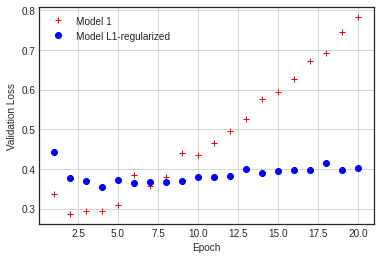

In [48]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

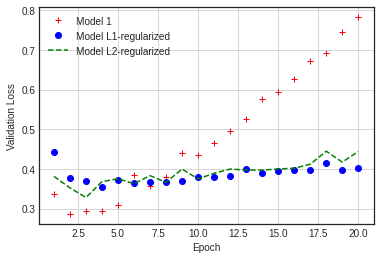

In [50]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()

#### L1, L2와 비교

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


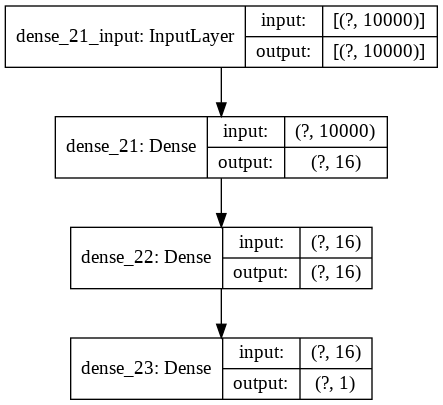

In [51]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

In [52]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs=20, 
                             batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 49ms/step - loss: 0.5824 - acc: 0.8141 - val_loss: 0.4483 - val_acc: 0.8764
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3947 - acc: 0.8866 - val_loss: 0.3813 - val_acc: 0.8864
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3461 - acc: 0.9017 - val_loss: 0.3773 - val_acc: 0.8784
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3291 - acc: 0.9050 - val_loss: 0.3711 - val_acc: 0.8810
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3164 - acc: 0.9116 - val_loss: 0.3610 - val_acc: 0.8874
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3084 - acc: 0.9140 - val_loss: 0.3738 - val_acc: 0.8816
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3077 - acc: 0.9133 - val_loss: 0.3637 - val_acc: 0.8864
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2994 - a

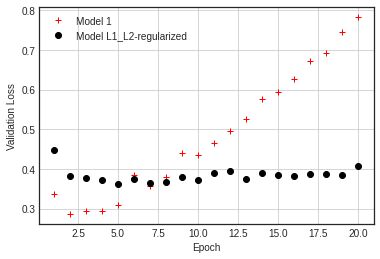

In [53]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

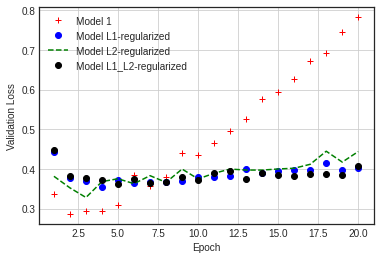

In [54]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [55]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


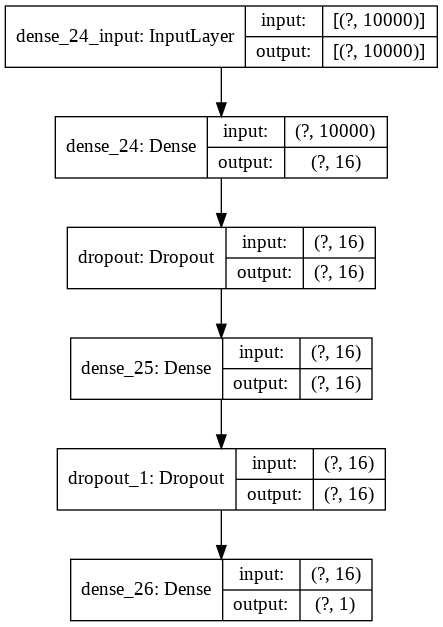

In [57]:
dropout_model = Sequential([Dense(16, activation='relu', input_shape=(10000, )), 
                            Dropout(0.5),
                            Dense(16, activation='relu'), 
                            Dropout(0.5),
                            Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [58]:
dropout_model_hist = dropout_model.fit(x_train, y_train, epochs=20, 
                             batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 46ms/step - loss: 0.5930 - acc: 0.6756 - val_loss: 0.4469 - val_acc: 0.8671
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4526 - acc: 0.8085 - val_loss: 0.3461 - val_acc: 0.8834
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3715 - acc: 0.8608 - val_loss: 0.3033 - val_acc: 0.8879
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3170 - acc: 0.8870 - val_loss: 0.2845 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2740 - acc: 0.9030 - val_loss: 0.2786 - val_acc: 0.8903
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2462 - acc: 0.9155 - val_loss: 0.2889 - val_acc: 0.8884
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2279 - acc: 0.9215 - val_loss: 0.2974 - val_acc: 0.8868
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2071 - a

#### 시각화

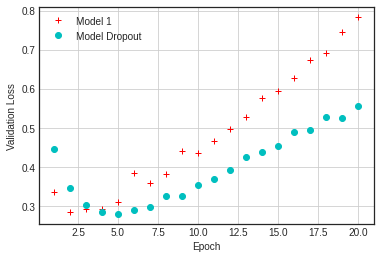

In [59]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label='Model Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()

plt.show()